# Plotting histograms, Part II

## From the previous episodes:

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
V_arr = np.array([7.3,10.6,8.0,10.4,11.9,14.3,11.8,10.7,11.4,11.3,13.0,10.1,8.4,10.7,10.5,10.2,10.4,9.2,11.6,11.0,10.5,10.7,10.6,8.7,8.2,11.8,7.9,10.7,7.9,15.1,10.5,10.9,10.7,10.9,9.4,11.4,8.6,9.2,8.1,6.8,11.1,11.7,8.0,10.4,5.3,12.0,11.0,9.7,8.6,8.8,9.2,9.5,10.0,11.7,8.5,11.9,13.5,10.3,9.1,13.0,13.3,11.0,11.9,7.0,5.7,9.8,12.8,13.8,10.6,13.0,6.1,12.2,9.3,9.7,6.5,9.9,9.8,12.4,9.7,5.8,12.7,10.1,7.6,10.3,11.1,11.2,9.9,12.6,12.3,11.7,13.5,6.8,9.2,9.6,11.1,10.7,10.6,10.9,10.5,10.1,9.0])
V_arr

array([ 7.3, 10.6,  8. , 10.4, 11.9, 14.3, 11.8, 10.7, 11.4, 11.3, 13. ,
       10.1,  8.4, 10.7, 10.5, 10.2, 10.4,  9.2, 11.6, 11. , 10.5, 10.7,
       10.6,  8.7,  8.2, 11.8,  7.9, 10.7,  7.9, 15.1, 10.5, 10.9, 10.7,
       10.9,  9.4, 11.4,  8.6,  9.2,  8.1,  6.8, 11.1, 11.7,  8. , 10.4,
        5.3, 12. , 11. ,  9.7,  8.6,  8.8,  9.2,  9.5, 10. , 11.7,  8.5,
       11.9, 13.5, 10.3,  9.1, 13. , 13.3, 11. , 11.9,  7. ,  5.7,  9.8,
       12.8, 13.8, 10.6, 13. ,  6.1, 12.2,  9.3,  9.7,  6.5,  9.9,  9.8,
       12.4,  9.7,  5.8, 12.7, 10.1,  7.6, 10.3, 11.1, 11.2,  9.9, 12.6,
       12.3, 11.7, 13.5,  6.8,  9.2,  9.6, 11.1, 10.7, 10.6, 10.9, 10.5,
       10.1,  9. ])

Text(0, 0.5, 'counts')

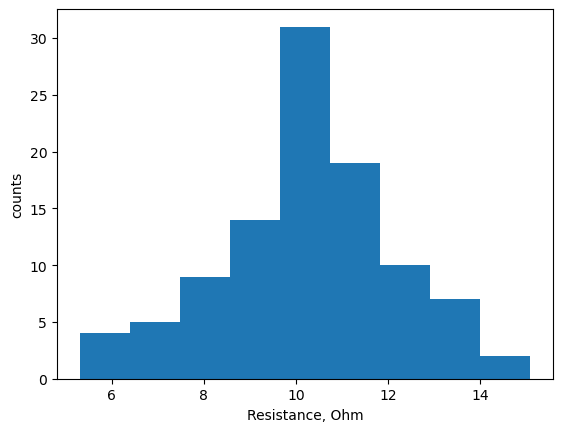

In [3]:
fig, ax = plt.subplots() #prepare to plot
ax.hist(V_arr, bins = 9) # plot histogram
ax.set_xlabel('Resistance, Ohm')
ax.set_ylabel('counts')

# Problem: Instead of the Data, We Are supplied with Bins and Counts

In [4]:
data = {'t_left':[6, 7, 8, 9, 10, 11, 12, 13, 14],
        't_right':[7, 8, 9, 10, 11, 12, 13, 14, 15],
        'N':[4, 5, 10, 17, 27, 19, 7, 7, 1]}
df = pd.DataFrame(data)
df.head(10)

,t_left,t_right,N
0,6,7,4
1,7,8,5
2,8,9,10
3,9,10,17
4,10,11,27
5,11,12,19
6,12,13,7
7,13,14,7
8,14,15,1


# Solution 1: "Manufacturing" Data

In [5]:
# find bin centers:

In [6]:
t_arr = 0.5 * (np.array(df['t_left'], dtype = float) + np.array(df['t_right'], dtype = float))
t_arr

array([ 6.5,  7.5,  8.5,  9.5, 10.5, 11.5, 12.5, 13.5, 14.5])

In [7]:
# Manufacture the data by assuming that all counts happen exactly at the time t = bin center:

In [8]:
counts_arr = np.array(df['N'])
n_arr = np.array([])
length = counts_arr.size
for i in range(0, length):
    cur_time = t_arr[i]
    cur_counts = np.zeros(int(counts_arr[i])) + cur_time
    n_arr = np.append(n_arr, cur_counts)
    print(n_arr)

[6.5 6.5 6.5 6.5]
[6.5 6.5 6.5 6.5 7.5 7.5 7.5 7.5 7.5]
[6.5 6.5 6.5 6.5 7.5 7.5 7.5 7.5 7.5 8.5 8.5 8.5 8.5 8.5 8.5 8.5 8.5 8.5
 8.5]
[6.5 6.5 6.5 6.5 7.5 7.5 7.5 7.5 7.5 8.5 8.5 8.5 8.5 8.5 8.5 8.5 8.5 8.5
 8.5 9.5 9.5 9.5 9.5 9.5 9.5 9.5 9.5 9.5 9.5 9.5 9.5 9.5 9.5 9.5 9.5 9.5]
[ 6.5  6.5  6.5  6.5  7.5  7.5  7.5  7.5  7.5  8.5  8.5  8.5  8.5  8.5
  8.5  8.5  8.5  8.5  8.5  9.5  9.5  9.5  9.5  9.5  9.5  9.5  9.5  9.5
  9.5  9.5  9.5  9.5  9.5  9.5  9.5  9.5 10.5 10.5 10.5 10.5 10.5 10.5
 10.5 10.5 10.5 10.5 10.5 10.5 10.5 10.5 10.5 10.5 10.5 10.5 10.5 10.5
 10.5 10.5 10.5 10.5 10.5 10.5 10.5]
[ 6.5  6.5  6.5  6.5  7.5  7.5  7.5  7.5  7.5  8.5  8.5  8.5  8.5  8.5
  8.5  8.5  8.5  8.5  8.5  9.5  9.5  9.5  9.5  9.5  9.5  9.5  9.5  9.5
  9.5  9.5  9.5  9.5  9.5  9.5  9.5  9.5 10.5 10.5 10.5 10.5 10.5 10.5
 10.5 10.5 10.5 10.5 10.5 10.5 10.5 10.5 10.5 10.5 10.5 10.5 10.5 10.5
 10.5 10.5 10.5 10.5 10.5 10.5 10.5 11.5 11.5 11.5 11.5 11.5 11.5 11.5
 11.5 11.5 11.5 11.5 11.5 11.5 11.5 11.5 1

In [9]:
df.head(10)

,t_left,t_right,N
0,6,7,4
1,7,8,5
2,8,9,10
3,9,10,17
4,10,11,27
5,11,12,19
6,12,13,7
7,13,14,7
8,14,15,1


Instead of giving thte number of bins, we can give to the hist() function bin borders explicitly. t_arr won't work as bins for the hist(function), due to the pecularities of it. For bins,
it needs an array of left borders of data, and the *last element* is the *right boundary* of the last bin

In [10]:
bins_for_hist = np.array(df['t_left'], dtype = float)
arr_right_borders = np.array(df['t_right'], dtype = float)
right_bound_of_the_last_bin = arr_right_borders[-1]
bins_for_hist = np.append(bins_for_hist, right_bound_of_the_last_bin)
bins_for_hist

array([ 6.,  7.,  8.,  9., 10., 11., 12., 13., 14., 15.])

Text(0, 0.5, 'Counts')

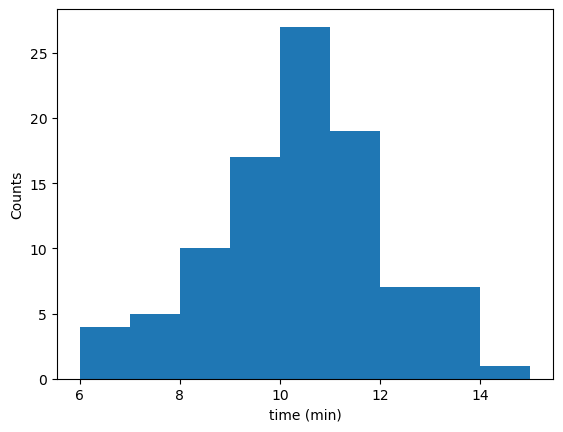

In [11]:
fig2, ax2 = plt.subplots()
ax2.hist(n_arr, bins = bins_for_hist, density = False)
ax2.set_xlabel("time (min)")
ax2.set_ylabel("Counts")

## Forget about the solution 1. Never manufacture your data

# Solution 2 (recommended): Make a Histogram Using Bar Plot

In [12]:
counts_arr = np.array(df['N'], dtype = float)
counts_arr

array([ 4.,  5., 10., 17., 27., 19.,  7.,  7.,  1.])

In [13]:
t_arr = 0.5 * (np.array(df['t_left'], dtype = float) + np.array(df['t_right'], dtype = float))
t_arr

array([ 6.5,  7.5,  8.5,  9.5, 10.5, 11.5, 12.5, 13.5, 14.5])

<BarContainer object of 9 artists>

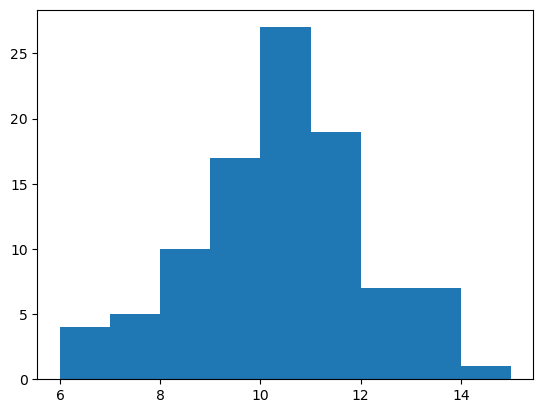

In [14]:
fig_bar, ax_bar = plt.subplots()
ax_bar.bar(t_arr, counts_arr, align = 'center', width = 1)

### hist() function of the PyPlot module is just bar() and histogram() from Numpy put together

#### I recommend using combination of histogram() and bar() instead of hist(), because of better control and for the sake of better understanding how it works:

In [15]:
V_arr

array([ 7.3, 10.6,  8. , 10.4, 11.9, 14.3, 11.8, 10.7, 11.4, 11.3, 13. ,
       10.1,  8.4, 10.7, 10.5, 10.2, 10.4,  9.2, 11.6, 11. , 10.5, 10.7,
       10.6,  8.7,  8.2, 11.8,  7.9, 10.7,  7.9, 15.1, 10.5, 10.9, 10.7,
       10.9,  9.4, 11.4,  8.6,  9.2,  8.1,  6.8, 11.1, 11.7,  8. , 10.4,
        5.3, 12. , 11. ,  9.7,  8.6,  8.8,  9.2,  9.5, 10. , 11.7,  8.5,
       11.9, 13.5, 10.3,  9.1, 13. , 13.3, 11. , 11.9,  7. ,  5.7,  9.8,
       12.8, 13.8, 10.6, 13. ,  6.1, 12.2,  9.3,  9.7,  6.5,  9.9,  9.8,
       12.4,  9.7,  5.8, 12.7, 10.1,  7.6, 10.3, 11.1, 11.2,  9.9, 12.6,
       12.3, 11.7, 13.5,  6.8,  9.2,  9.6, 11.1, 10.7, 10.6, 10.9, 10.5,
       10.1,  9. ])

In [16]:
df.head(10)

,t_left,t_right,N
0,6,7,4
1,7,8,5
2,8,9,10
3,9,10,17
4,10,11,27
5,11,12,19
6,12,13,7
7,13,14,7
8,14,15,1


In [17]:
counts, bins = np.histogram(V_arr, 9)

In [18]:
counts

array([ 4,  5,  9, 14, 31, 19, 10,  7,  2], dtype=int64)

In [19]:
bins

array([ 5.3       ,  6.38888889,  7.47777778,  8.56666667,  9.65555556,
       10.74444444, 11.83333333, 12.92222222, 14.01111111, 15.1       ])

In [20]:
# not very "beautiful" bins boundaries by default. Come up with our own:

In [21]:
my_bins = np.array([6, 7, 8, 9, 10, 11, 12, 13, 14, 15])
my_bins

array([ 6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

In [22]:
counts, bins = np.histogram(V_arr, my_bins)

### If you try to use bins in bar() as they were given by np.histogram(), you'll get an error that your abscissa array and ordinate array have different length:

ValueError: shape mismatch: objects cannot be broadcast to a single shape

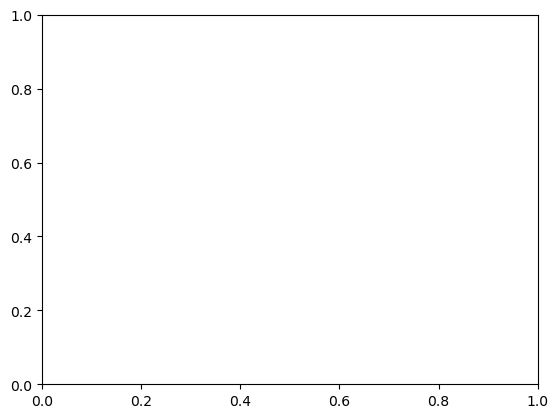

In [23]:
fig_r, ax_r = plt.subplots()
ax_r.bar(bins, counts, width = 1)

### That happens because histogram outputs the boundaries for bins in the format used by both histogram and hist(): as an array of left boudnaries of all bins PLUS the right boundary of the last bin. So, if the number of bins is N, then the length of the bins array will be N + 1:

In [24]:
bins

array([ 6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

In [25]:
counts

array([ 4,  5, 10, 17, 27, 19,  7,  7,  1], dtype=int64)

In [26]:
len(bins)

10

In [27]:
len(counts)

9

### Instead, let's create an array containing CENTERS of all bins. The length of that array will be N, and not N+1:

In [31]:
arr_bins_centers = 0.5 * (bins[1:] + bins[:-1])

In [32]:
arr_bins_centers

array([ 6.5,  7.5,  8.5,  9.5, 10.5, 11.5, 12.5, 13.5, 14.5])

In [33]:
len(arr_bins_centers)

9

### Now we can use bar() function for plotting our histogram:

<BarContainer object of 9 artists>

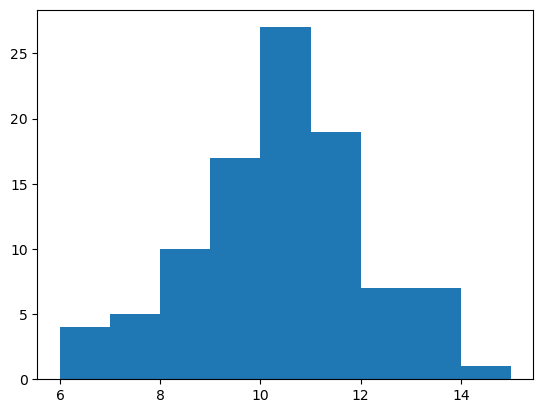

In [30]:
fig_r2, ax_r2 = plt.subplots()
ax_r2.bar(arr_bins_centers, counts, width = 1)